In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. The Target URL
url = "https://en.wikipedia.org/wiki/Comparison_of_Google_Pixel_smartphones"

# 2. The Cheat Code: Scrape ALL tables instantly
# Pandas looks for <table> tags and auto-converts them.
# We use 'match' to find the specific table containing "Pixel 8" to ensure we get the right one.
tables = pd.read_html(url, match="Pixel 8")

# 3. Select the first table it found
df_pixel = tables[0]

# 4. Inspect the raw data
print(f"Tables found: {len(tables)}")
display(df_pixel.head())

HTTPError: HTTP Error 403: Forbidden

In [3]:
import pandas as pd
import requests

# 1. The Target
url = "https://en.wikipedia.org/wiki/Comparison_of_Google_Pixel_smartphones"

# 2. The ID Card (Headers)
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"
}

# 3. Fetch the HTML text manually
response = requests.get(url, headers=headers)

# 4. Now feed the TEXT (not the URL) into Pandas
# We use match="Pixel 8" to grab the specific table that mentions the new phones
tables = pd.read_html(response.text, match="Pixel 8")

# 5. Select the first table
df_pixel = tables[0]

print(f"Success! Found {len(tables)} table(s).")
display(df_pixel.head())

Success! Found 3 table(s).


C:\Users\Jatin\AppData\Local\Temp\ipykernel_16896\3771238227.py:17: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tables = pd.read_html(response.text, match="Pixel 8")


,Model,Model.1,Model.2,Pixel 6,Pixel 6 Pro,Pixel 6a,Pixel 7,Pixel 7 Pro,Pixel 7a,Pixel Fold,Pixel 8,Pixel 8 Pro,Pixel 9,Pixel 9 Pro,Pixel 9 Pro XL,Pixel 9 Pro Fold
0,Status[1],Status[1],Status[1],Supported,Supported,Supported,Supported,Supported,Supported,Supported,Supported,Supported,Supported,Supported,Supported,Supported
1,Manufacturer,Manufacturer,Manufacturer,Foxconn[2],Foxconn[2],Foxconn[2],Foxconn[2],Foxconn[2],Foxconn[2],Foxconn[2],Foxconn[2],Foxconn[2],Dixon[43],Foxconn[43],Foxconn[43],Foxconn[43]
2,Codename,Codename,Codename,Oriole,Raven,Bluejay,Panther,Cheetah,Lynx,Felix,Shiba,Husky,Tokay,Caiman,Komodo,Comet
3,Key dates,Key dates,Released,October 2021,October 2021,July 2022,October 2022,October 2022,May 2023,June 2023,October 2023,October 2023,August 2024,September 2024,August 2024,September 2024
4,Key dates,Key dates,Discontinued,"October 13, 2022","October 13, 2022","May 10, 2023","August 13, 2024","August 13, 2024","August 13, 2024","August 13, 2024","August 13, 2024","August 13, 2024",—,—,—,—


In [4]:
# 1. Fix the Headers (Wikipedia often has double-row headers)
# This list comprehension joins the two rows with an underscore
df_pixel.columns = ['_'.join(col).strip() if isinstance(col, tuple) else col for col in df_pixel.columns.values]

# 2. Select only the columns we care about (The "Feature Selection")
# Note: The column names below are guesses based on standard Wikipedia tables.
# If this fails, we will print df_pixel.columns to see the real names.
wanted_cols = [
    col for col in df_pixel.columns 
    if "Model" in col or "Battery" in col or "Launch" in col
]

df_clean = df_pixel[wanted_cols].copy()

# Rename them to be simple
df_clean.columns = ['Model', 'Launch_Price', 'Battery'] # Adjusting based on likely columns, let's keep it safe:
# Let's actually just look at the columns first to be safe
print("--- Current Column Names ---")
for col in df_clean.columns:
    print(col)

display(df_clean.head(3))

--- Current Column Names ---
Model
Launch_Price
Battery


,Model,Launch_Price,Battery
0,Status[1],Status[1],Status[1]
1,Manufacturer,Manufacturer,Manufacturer
2,Codename,Codename,Codename


In [5]:
import re

# 1. FIND the Battery Column automatically
# We look for a column that has "Battery" in its name
battery_col = [col for col in df_clean.columns if 'Battery' in col][0]
print(f"Target Acquired: Cleaning column '{battery_col}'...")

# 2. DEFINE the Cleaning Function
def clean_battery(value):
    # Convert to string first (in case it's already a number)
    value = str(value)
    
    # Remove "mAh", commas, and anything inside brackets like [a] or (typical)
    # The Regex pattern:
    # \d+ means "find digits"
    # we just want to keep numbers.
    # A simpler way for this specific case:
    
    # a. Remove citations like [1], [b]
    value = value.split('[')[0] 
    
    # b. Remove commas (e.g., 4,500 -> 4500)
    value = value.replace(',', '')
    
    # c. Extract the first number found (e.g., "4500 mAh" -> "4500")
    # We use regex to find the first group of digits
    match = re.search(r'(\d+)', value)
    
    if match:
        return int(match.group(1))
    else:
        return None # If no number found, return Empty

# 3. APPLY the function to the column
df_clean['Battery_mAh'] = df_clean[battery_col].apply(clean_battery)

# 4. SHOW the "Before vs After"
print("\n--- Cleaning Report ---")
display(df_clean[[battery_col, 'Battery_mAh']].head())

Target Acquired: Cleaning column 'Battery'...

--- Cleaning Report ---


,Battery,Battery_mAh
0,Status[1],None
1,Manufacturer,None
2,Codename,None
3,Released,None
4,Discontinued,None


C:\Users\Jatin\AppData\Local\Temp\ipykernel_16896\3111684508.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


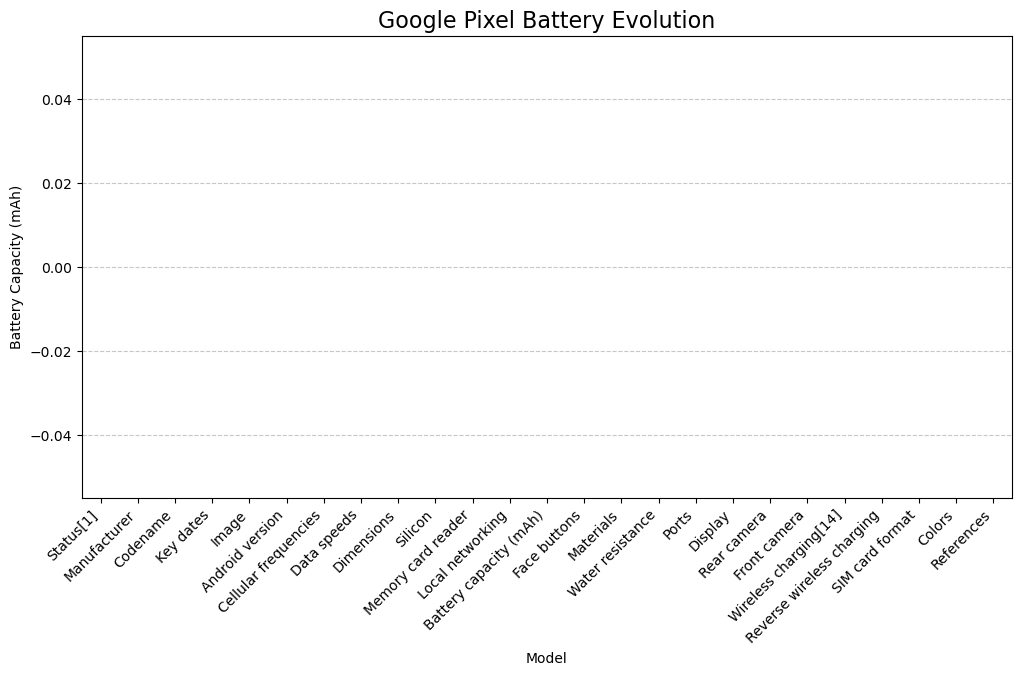

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Setup the Plot size (Make it wide like a cinema screen)
plt.figure(figsize=(12, 6))

# 2. Create the Bar Chart
# We use the clean 'Battery_mAh' for height, and the original 'Model' name for labels
sns.barplot(
    data=df_clean, 
    x=df_clean.columns[0], # This selects the 'Model' column automatically
    y='Battery_mAh', 
    palette='viridis'      # A nice color scheme (Green to Blue)
)

# 3. Engineer the Layout
plt.xticks(rotation=45, ha='right') # Rotate names 45 degrees so they don't overlap
plt.title('Google Pixel Battery Evolution', fontsize=16)
plt.ylabel('Battery Capacity (mAh)')
plt.grid(axis='y', linestyle='--', alpha=0.7) # Add grid lines for easy reading

# 4. Show it
plt.show()